In [54]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('diabetes.csv')

# Basic inspection
print(f"Shape: {df.shape}")
df.head()


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values before:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


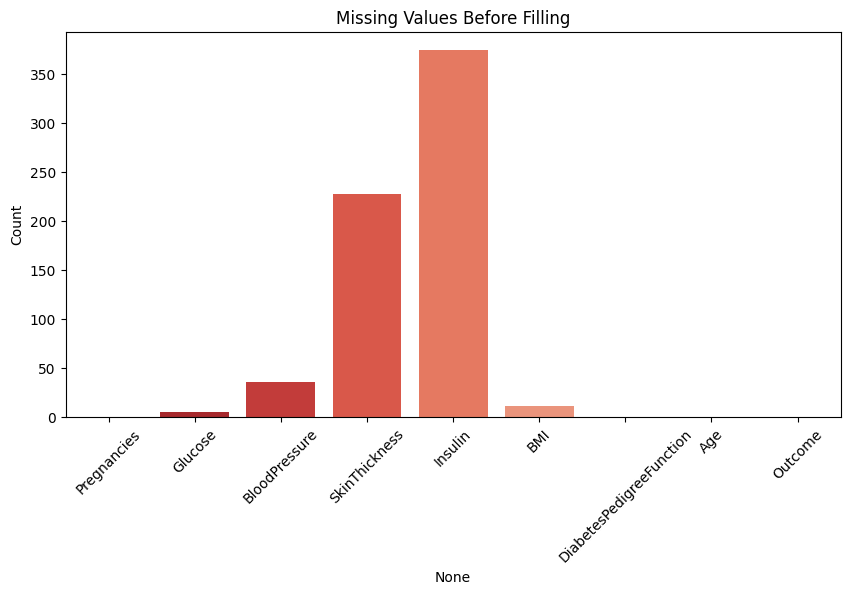


Missing values after:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


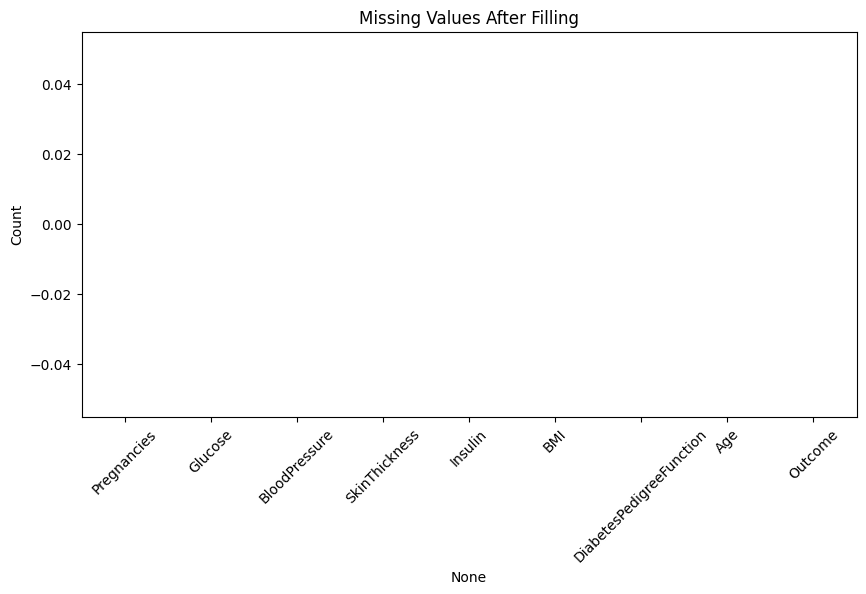

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0s with NaN in relevant columns
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Count missing values before filling
missing_before = df.isnull().sum()

# Show counts as text
print("Missing values before:\n", missing_before)

# Visualize missing values before
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_before.index, y=missing_before.values, hue=missing_before.index, palette='Reds_r', legend=False)
plt.title("Missing Values Before Filling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Count missing values after filling
missing_after = df.isnull().sum()

# Show counts as text
print("\nMissing values after:\n", missing_after)

# Visualize missing values after
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_after.index, y=missing_after.values, hue=missing_after.index, palette='Greens', legend=False)
plt.title("Missing Values After Filling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

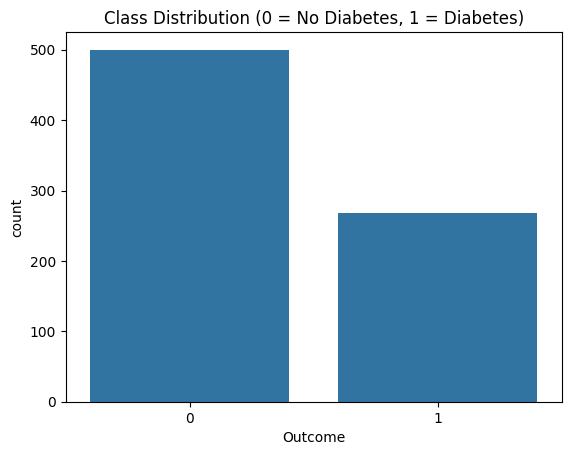

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()


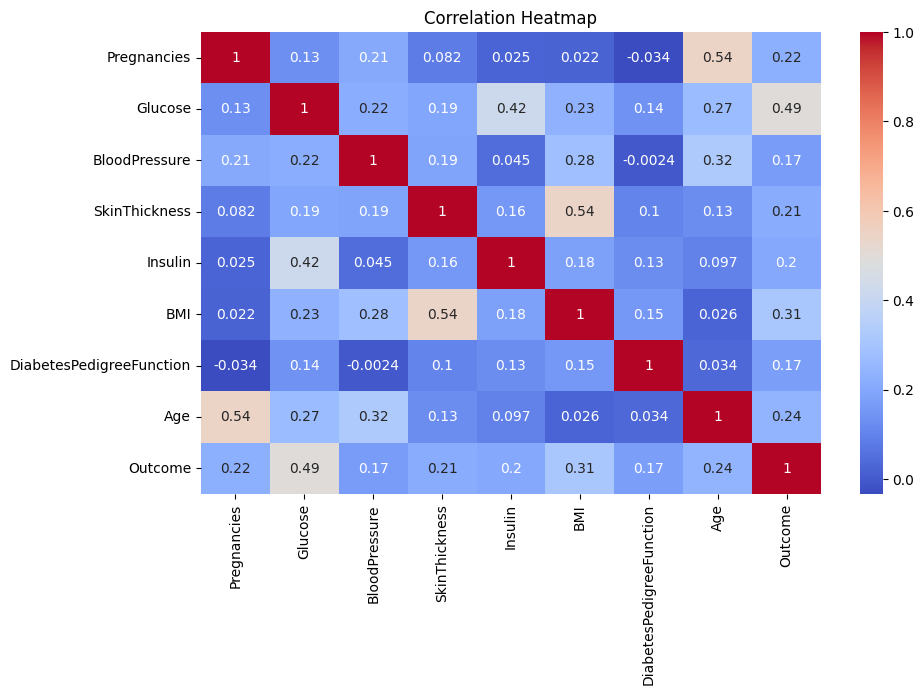

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


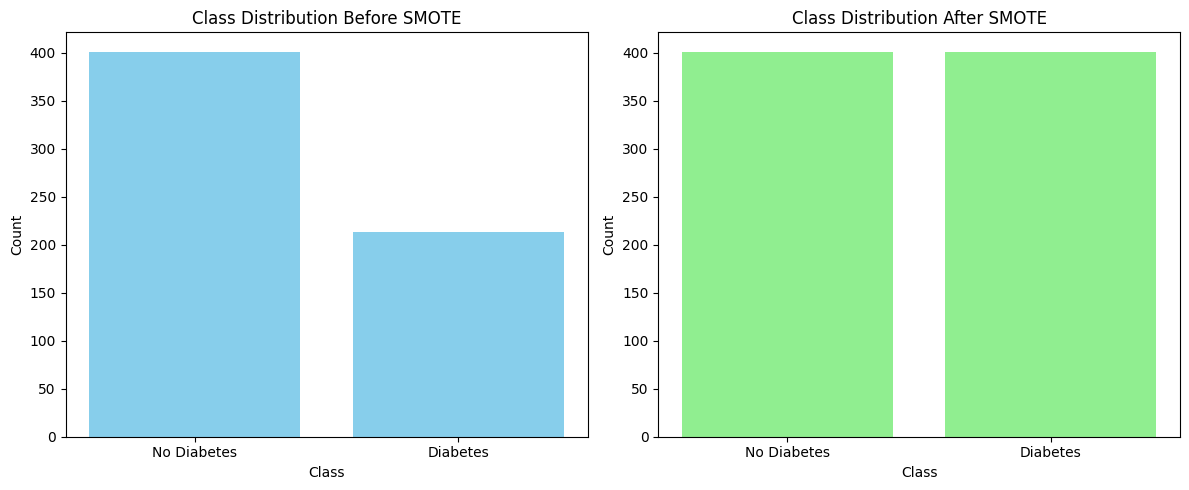

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Original class distribution
original_counts = Counter(y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Balanced class distribution
balanced_counts = Counter(y_train_bal)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axs[0].bar(original_counts.keys(), original_counts.values(), color='skyblue')
axs[0].set_title("Class Distribution Before SMOTE")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Count")
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No Diabetes', 'Diabetes'])

# After SMOTE
axs[1].bar(balanced_counts.keys(), balanced_counts.values(), color='lightgreen')
axs[1].set_title("Class Distribution After SMOTE")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count")
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


=== Logistic Regression ===
Train Accuracy: 0.75810
Test Accuracy: 0.70779
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



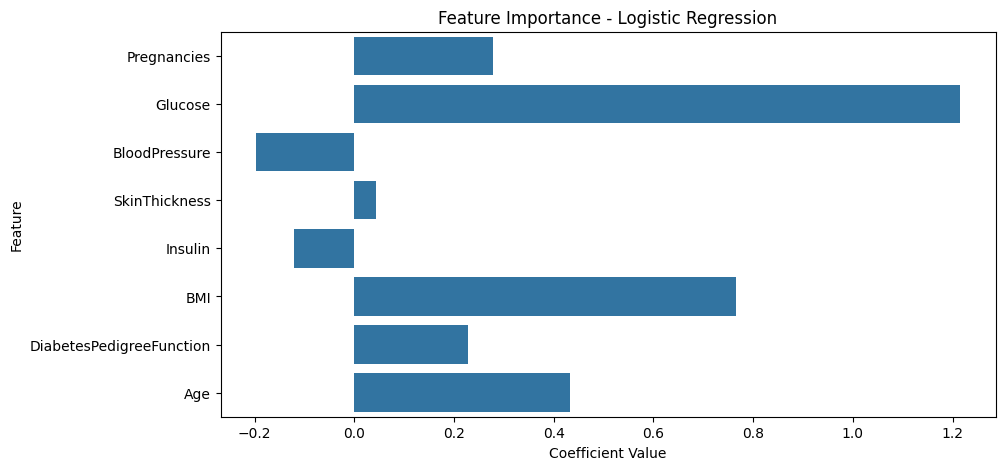

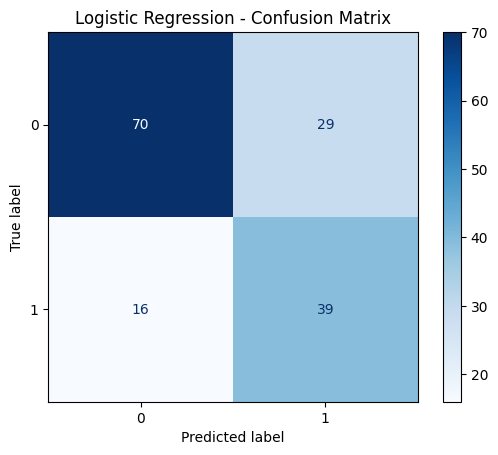

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predict
y_train_pred_lr = lr.predict(X_train_bal)
y_test_pred_lr = lr.predict(X_test)

# Accuracy
train_acc_lr = accuracy_score(y_train_bal, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print("=== Logistic Regression ===")
print(f"Train Accuracy: {train_acc_lr:.5f}")
print(f"Test Accuracy: {test_acc_lr:.5f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

# Feature importance - Logistic Regression (corrected)
feature_importance_lr = pd.Series(lr.coef_[0], index=df.columns[:-1])

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_lr, y=feature_importance_lr.index)
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

=== Random Forest ===
Train Accuracy: 0.87282
Test Accuracy: 0.74675
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        99
           1       0.61      0.84      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.75       154



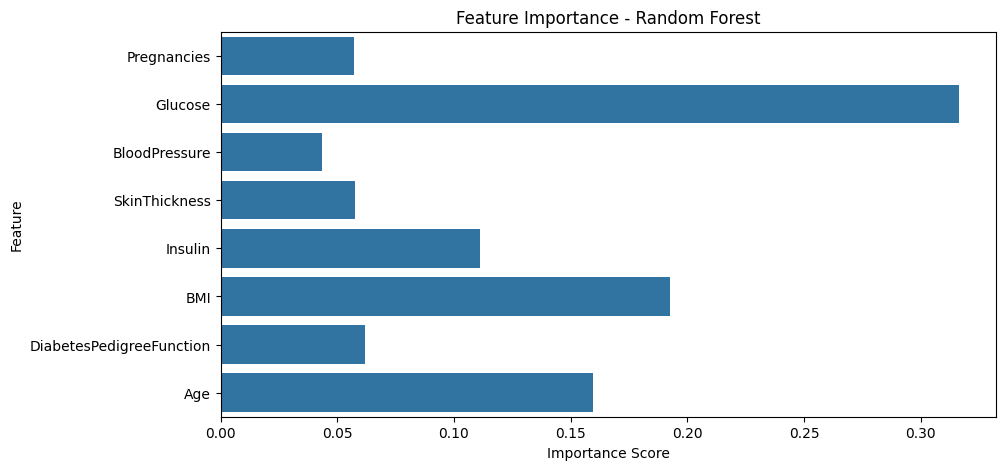

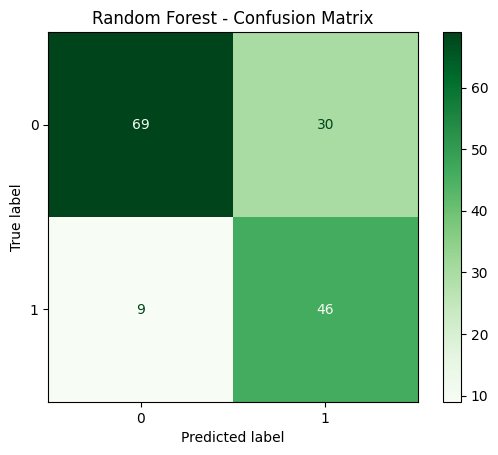

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_train_pred_rf = rf.predict(X_train_bal)
y_test_pred_rf = rf.predict(X_test)

train_acc_rf = accuracy_score(y_train_bal, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("=== Random Forest ===")
print(f"Train Accuracy: {train_acc_rf:.5f}")
print(f"Test Accuracy: {test_acc_rf:.5f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Feature importance - Random Forest
feature_importance_rf = pd.Series(rf.feature_importances_, index=df.columns[:-1])
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_rf, y=feature_importance_rf.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Confusion Matrix - Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title('Random Forest - Confusion Matrix')
plt.show()


=== Model Accuracy Comparison ===
              Model  Train Accuracy  Test Accuracy
Logistic Regression        0.758105       0.707792
      Random Forest        0.872818       0.746753


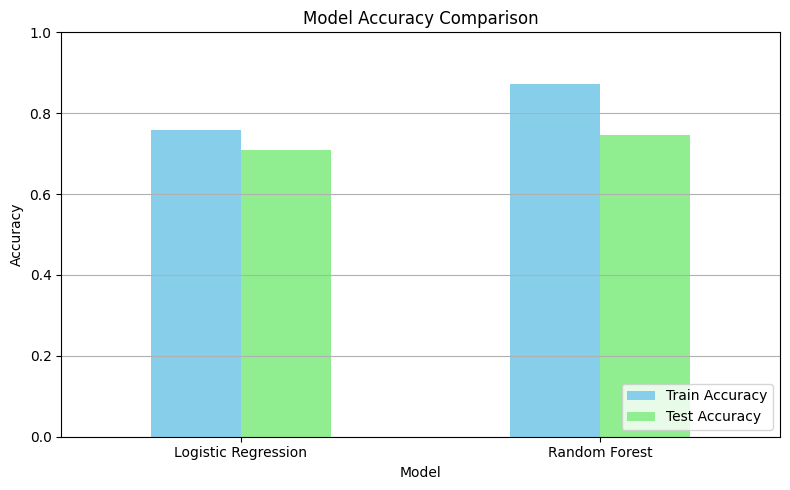

In [62]:
print("\n=== Model Accuracy Comparison ===")
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Train Accuracy": [train_acc_lr, train_acc_rf],
    "Test Accuracy": [test_acc_lr, test_acc_rf]
})

print(comparison_df.to_string(index=False))

#Bar chart for visual comparison
comparison_df.set_index("Model")[["Train Accuracy", "Test Accuracy"]].plot(
    kind="bar", figsize=(8, 5), color=["skyblue", "lightgreen"]
)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()